Santiago Iván Pardo Morales



202013025

# **EXAMEN 1 - INTELIGENCIA DE NEGOCIOS**

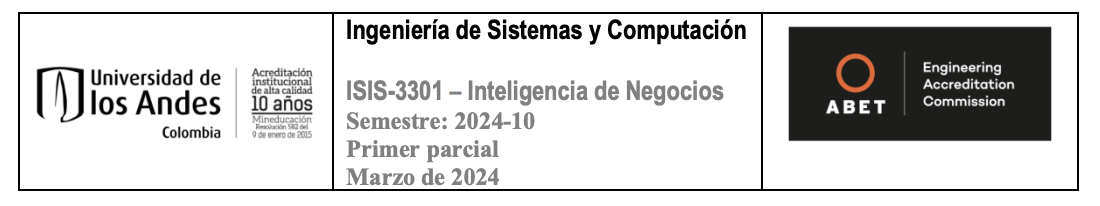

Al entregar la solución de este parcial, yo, Santiago Iván Pardo Morales con código 202013025 me comprometo a no
conversar durante el desarrollo de este examen con ninguna persona que no sea el profesor del curso, sobre
aspectos relacionados con el parcial; tampoco utilizaré algún medio de comunicación por voz, texto o
intercambio de archivos, para consultar o compartir con otros, información sobre el tema del parcial. Ni usaré
alguna IA para resolver las preguntas del parcial. Soy consciente y acepto las consecuencias que acarreará
para mi desempeño académico cometer fraude en este parcial.

### Contexto

El Objetivo de Desarrollo Sostenible (ODS) número 15 de la Organización de las Naciones Unidas (ONU), se centra en "Vida de Ecosistemas Terrestres". Este objetivo busca proteger, restaurar y promover el uso sostenible de los ecosistemas terrestres, gestionar de manera sostenible los bosques, combatir la desertificación, detener e invertir la degradación de las tierras y frenar la pérdida de biodiversidad.


Frente a esta situación, EcoAlpes ha decidido realizar una serie de experimentos sobre plantas, para ver el efecto que fenómenos como el cambio climático pueden tener en los ecosistemas. Es en este contexto donde ha visto la oportunidad de analizar información que actualmente posee de experimentos con plantas y ver si una solución basada en analítica con el uso de aprendizaje automático puede aportar en el logro de ese objetivo.


EcoAlpes ha decidido contratarlo con el fin de aprovechar su experiencia en el desarrollo de proyectos similares utilizando el conjunto de datos proporcionado. En esta primera fase de colaboración, EcoAlpes busca su ayuda para identificar posibles relaciones entre las características de las plantas, su entorno de crecimiento, los elementos específicos del experimento y el hecho de sobrevivir o no. Esto permitirá determinar la tolerancia de las plantas a la sombra en dichas condiciones.

## PARTE 1 : DEFINICIÓN DEL ENFOQUE ANALÍTICO

**RESPUESTA**


Con base en el contexto de la empresa, los datos suministrados y el objetivo establecido, se sugiere abordar este problema por medio de un modelo de Machine Learning con las siguientes características

* Tipo de aprendizaje: No supervisado
* Tarea de aprendizaje: Agrupaciónn
* Algoritmo de aprendizaje: K-Means Clustering

Se recomienda el aprendizaje no supervisado debido a que, desde una primera vista de los datos, estos contienen una gran cantidad de atributos numéricos los cuales pueden ser agrupados, segmentados en características similares que presenten y permitan reflejar el cambio de las plantas en el contexto de ecosistemas.

Sin embargo, también es importante notar que al escoger este algoritmo, y representar una buena tarea de agrupación, no será posible llegar a conclusiones de atributos que podrían ser importantes como por ejemplo el tipo de especie, el nivel de luz, el filtrado microbiano o si la célula está muerta o no. Ya que el algoritmo no funciona bien en presencia de este tipo de variables, las cuales son categóricas, por ende, se tratará de hacer una aproximación al contexto y solución del problema con variables de tipo numérico.


## **ANEXO**

In [4]:
#pip install ydata_profiling

In [58]:
#Librerias a importar
import pandas as pd
import numpy as np
import seaborn as sns
import ydata_profiling
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
from matplotlib import cm

In [6]:
#Para cargar datos

df = pd.read_csv("Datos_examen 1.csv",sep=";",encoding="latin-1")
dicc = pd.read_excel("Diccionario_examen 1.xlsx")

In [7]:
df

,No,Especie,Luz,Microbio,Cosecha,Tiempo,Evento,NSC,Lignina,AMF_Imp,PHN_Imp,NSC_Imp,LIG_Imp
0,8,Acsa,Baja,Combinado,3.0,21,0,NaN,9.11,55.07,-0.05,5.64,9.11
1,10,Acru,Baja,Combinado,3.0,21,0,NaN,4.66,36.00,-0.01,6.37,4.66
2,22,Acne,Baja,Combinado,NaN,22,1,NaN,NaN,64.93,0.03,7.65,8.34
3,23,Acne,Baja,Combinado,9.0,63,0,NaN,9.87,71.00,0.00,8.02,9.87
4,32,Acsa,Baja,Combinado,6.0,42,0,NaN,14.51,62.00,0.13,11.11,14.51
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1202,2368,Acne,Alta,Pequeño,NaN,63,1,NaN,NaN,1.42,0.12,9.83,7.75
1203,2381,Acru,Alta,Pequeño,NaN,29,1,NaN,NaN,1.42,0.12,9.83,7.75
1204,2386,Acru,Alta,Pequeño,NaN,63,1,NaN,NaN,24.94,0.45,16.33,7.84
1205,2390,Acsa,Alta,Pequeño,NaN,63,1,NaN,NaN,24.67,0.45,16.01,7.80


In [8]:
#Realizar lectura de diccionario
dicc

,Columna,Tipo,Descripción
0,No,numérica,Número de identificación único de la plántula.
1,Especie,categórica,Especies de árboles templados que coexisten en...
2,Luz,categórica,Luz: Los niveles de luz se crearon utilizando ...
3,Microbios,categórica,Filtrados microbiano que se obtuvieron mediant...
4,Cosecha,numérica,Momento (en semanas) en que se cosechó la plán...
5,Tiempo,numérica,Número de días del experimento en los que la p...
6,Evento,categórica,Se utiliza en el análisis de supervivencia par...
7,NSC,numérica,Porcentaje de masa seca de carbohidratos no es...
8,Lignina,numérica,Porcentaje de masa seca de lignina.
9,AMF_imp,numérica,"Porcentaje de colonización de AMF, imputado a ..."


Al leer el diccionario se obtienen varias observaciones importantes

* El atributo Luz únicamente puede obtener valores Bajo y Alto

* El atributo Microbios únicamente puede ser Pequeño, Grande, Combinado, Control

* El atributo cosecha es numérico únicamente puede tener los valores 3, 6 o 9

* El número de tiempo se encuentra en días, por lo que no puede ser un valor negativo

* Los datos ausentes son identificados como NaN

## PARTE 2 : REVISIÓN DE CALIDAD Y PREPARACIÓN DE DATOS

**RESPUESTA**

### Análisis de la Revisión de Calidad de los Datos

Basado en el reporte generado con profiling, se pueden obtener las siguientes observaciones

* La variable No contiene datos únicos, por lo que esto comprueba que los datos no están duplicados

* En general, hay 1207 datos y 13 atributos analizados.

* En total, hay un 13.8% de datos nulos en todo el dataset

* No hay datos duplicado

* La variable Luz concuerda con lo mencionado en el diccionario de los datos al ser una variable categórica que únicamente contiene los valores Alto y Bajo

* La variable Microbios presenta valores consistentes con lo mencionado en el diccionario de datos, es decir, únicamente se encuentran valores de categoría Combinado, Pequeño, Control y Grande

* La variable Cosecha muestra ser categórica en el reporte, sin embargo, según el diccionario se representa como una variable numérica, con la restricción de que sólo puede tener los valores 3,6 y 9

* Las variables AMF_imp, PHN_imp, NSC_imp y LIG_imp son numéricas y acordes a lo que menciona en el diccionario de los datos

* La variable NSC contiene un 98.9% de datos nulos en toda la tabla, por lo que sería necesario eliminar esta columna ya que no aportaría en gran medida al modelo

* La variable Cosecha presenta un 39.8% de datos nulos en toda la tabla

* La variable Lignina presenta un 40.9% de datos nulos en toda la tabla

Basado en el mapa de correlación, se puede observar  que hay una correlación alta entre valores como por ejemplo

* NSC con Cosecha, Tiempo, Evento y Lignina

* Cosecha con Tiempo

* PHN_Imp con NSC_Imp

Basado en los diagramas de caja, se encontró lo siguiente:

* Se encontraron muchos outliers en los atributos Cosecha y Lignina, por lo que no se utilizarán dentro de la etapa de eliminación de outliers en la limpieza de datos

* Por lo tanto, en caso de que se incluyan estos atributos para el modelo, sólo se eliminarán outliers para los atributos PHN_Imp, NSC_Imp, LIG_Imp y NSC

### Verificación de Supuestos

* Con respecto a la consistencia. Hay variables que según el diccionario son categóricas pero en la descripción del diccionario de los datos aparece como numérica, como es el caso de la variable Cosecha.

* Con respecto a la validez, Se comprobó que todas las variables de los datos cumplen con las restricciones impuestas en el diccionario de los datos

* Con respecto a la unicidad, no se presentan filas duplicadas

* Con respecto a la completitud, las variables Cosecha, Lignina y NSC no presentan un índice de completitud de 1, por lo que contienen un porcentaje significativo de datos nulos

### Transformación de Datos


Basado en lo realizado en el entendimiento de los datos es necesario realizar lo siguiente

* Es necesario eliminar todas las variables que sean categóricas (según el diccionario de datos), esto debido a que el algoritmo de K-Means se basa en el calculo de centroides, por lo que no es muy coherente hacer el cálculo de un centroide para una variable categórica.

* Es necesario eliminar el atributo No, ya que el valor no es importante a la hora de hacer la agrupación, además contiene sólo valores únicos

* Es necesario eliminar la columna NSC, ya que tiene un índice de completitud muy bajo, por lo que no aporta al modelo al tener sólo datos nulos.

* Es necesario eliminar los atributos Cosecha y Lignina dado que presentan un índice de completitud bajo y a la hora de realizar la eliminación de variables nulas, se perderían muchos datos-

* Se eliminarán outliers de los atributos PHN_Imp, NSC_Imp, LIG_Imp, con el objetivo de no afectar el cálculo de centroides en el algoritmo de K-Means

* Es necesario realizar la normalización para darle un igual valor a todas las variables y una mejor convergencia en términos de los centroides en el algoritmo de K-Means


## **ANEXO**

En primer lugar, se generará un reporte de forma general el cual permita hacer una descripción general de todas las variables, así como una posible correlación entre ellas y la cantidad de valores nulos que cada valor presenta. El reporte se encontrará adjunto junto con esta entrega.

In [61]:
#Si se desea ejecutar, descomentar y ejecutarlo una sola vez
#profiling = ydata_profiling.ProfileReport(df)
#profiling.to_file("profiling_report_exam1.html")

**NOTA: EL REPORTE DE PROFILING SE ADJUNTARÁ JUNTO CON EL EXAMEN**

Basado en el reporte, es necesario anotar las siguientes observaciones

* La variable No contiene datos únicos, por lo que esto comprueba que los datos no están duplicados

* En general, hay 1207 datos y 13 atributos analizados.

* En total, hay un 13.8% de datos nulos en todo el dataset

* No hay datos duplicado

* La variable Luz concuerda con lo mencionado en el diccionario de los datos al ser una variable categórica que únicamente contiene los valores Alto y Bajo

* La variable Microbios presenta valores consistentes con lo mencionado en el diccionario de datos, es decir, únicamente se encuentran valores de categoría Combinado, Pequeño, Control y Grande

* La variable Cosecha muestra ser categórica en el reporte, sin embargo, según el diccionario se representa como una variable numérica, con la restricción de que sólo puede tener los valores 3,6 y 9

* Las variables AMF_imp, PHN_imp, NSC_imp y LIG_imp son numéricas y acordes a lo que menciona en el diccionario de los datos

* La variable NSC contiene un 98.9% de datos nulos en toda la tabla, por lo que sería necesario eliminar esta columna ya que no aportaría en gran medida al modelo

* La variable Cosecha presenta un 39.8% de datos nulos en toda la tabla

* La variable Lignina presenta un 40.9% de datos nulos en toda la tabla



Resumen de variables

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1207 entries, 0 to 1206
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   No        1207 non-null   int64  
 1   Especie   1207 non-null   object 
 2   Luz       1207 non-null   object 
 3   Microbio  1207 non-null   object 
 4   Cosecha   727 non-null    float64
 5   Tiempo    1207 non-null   int64  
 6   Evento    1207 non-null   int64  
 7   NSC       13 non-null     float64
 8   Lignina   713 non-null    float64
 9   AMF_Imp   1207 non-null   float64
 10  PHN_Imp   1207 non-null   float64
 11  NSC_Imp   1207 non-null   float64
 12  LIG_Imp   1207 non-null   float64
dtypes: float64(7), int64(3), object(3)
memory usage: 122.7+ KB


En esta descripción se puede observar los datos, con la excepción del atributo cosecha, concuerdan con su tipo de dato entre numérico y categórico, tal y como se dice en el diccionario de los datos

In [12]:
df.describe()

,No,Cosecha,Tiempo,Evento,NSC,Lignina,AMF_Imp,PHN_Imp,NSC_Imp,LIG_Imp
count,1207.000000,727.000000,1207.000000,1207.000000,13.000000,713.000000,1207.000000,1207.000000,1207.000000,1207.000000
mean,1206.599006,6.057772,45.834300,0.419221,4.726154,8.522763,32.586413,0.162336,10.118782,11.940398
std,693.905942,2.463948,17.284059,0.493636,2.549881,3.303644,31.826894,0.189811,3.285508,61.993902
min,8.000000,3.000000,15.000000,0.000000,1.810000,1.350000,-0.030000,-0.390000,0.670000,1.190000
25%,615.000000,3.000000,28.000000,0.000000,2.300000,5.800000,0.640000,0.020000,7.980000,7.045000
50%,1190.000000,6.000000,42.000000,0.000000,4.860000,8.140000,26.090000,0.140000,9.980000,8.340000
75%,1804.000000,9.000000,63.000000,1.000000,6.390000,10.990000,64.930000,0.290000,12.185000,11.210000
max,2400.000000,9.000000,63.000000,1.000000,8.630000,17.740000,99.000000,0.710000,21.310000,1354.000000


### Diagramas de Caja

Se realizará un diagrama de cajas para cada variable numérica (excepto la variable No, que presenta una variabilidad de 100%), con el objetivo de identificar outliers a ojo propio

In [13]:
df

,No,Especie,Luz,Microbio,Cosecha,Tiempo,Evento,NSC,Lignina,AMF_Imp,PHN_Imp,NSC_Imp,LIG_Imp
0,8,Acsa,Baja,Combinado,3.0,21,0,NaN,9.11,55.07,-0.05,5.64,9.11
1,10,Acru,Baja,Combinado,3.0,21,0,NaN,4.66,36.00,-0.01,6.37,4.66
2,22,Acne,Baja,Combinado,NaN,22,1,NaN,NaN,64.93,0.03,7.65,8.34
3,23,Acne,Baja,Combinado,9.0,63,0,NaN,9.87,71.00,0.00,8.02,9.87
4,32,Acsa,Baja,Combinado,6.0,42,0,NaN,14.51,62.00,0.13,11.11,14.51
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1202,2368,Acne,Alta,Pequeño,NaN,63,1,NaN,NaN,1.42,0.12,9.83,7.75
1203,2381,Acru,Alta,Pequeño,NaN,29,1,NaN,NaN,1.42,0.12,9.83,7.75
1204,2386,Acru,Alta,Pequeño,NaN,63,1,NaN,NaN,24.94,0.45,16.33,7.84
1205,2390,Acsa,Alta,Pequeño,NaN,63,1,NaN,NaN,24.67,0.45,16.01,7.80


In [14]:
cat_var = ["Especie","Luz", "Microbio","Evento"]

In [15]:
especie_g = df[["Especie"]].value_counts()
luz_g = df[["Luz"]].value_counts()
microbios_g = df[["Microbio"]].value_counts()
evento_g = df[["Evento"]].value_counts()

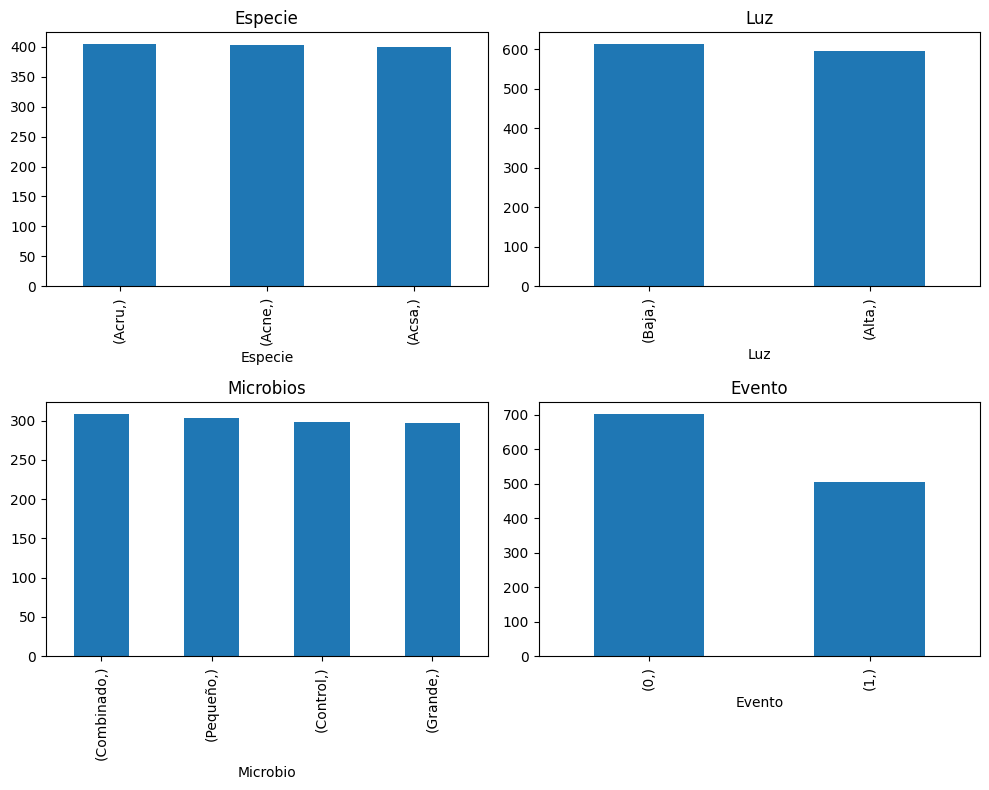

In [16]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Gráfica 1
especie_g.plot(kind='bar', ax=axes[0, 0])
axes[0, 0].set_title('Especie')

# Gráfica 2
luz_g.plot(kind='bar', ax=axes[0, 1])
axes[0, 1].set_title('Luz')

# Gráfica 3
microbios_g.plot(kind='bar', ax=axes[1, 0])
axes[1, 0].set_title('Microbios')

# Gráfica 4
evento_g.plot(kind='bar', ax=axes[1, 1])
axes[1, 1].set_title('Evento')

# Ajustar el diseño de los subplots
plt.tight_layout()

# Mostrar el gráfico
plt.show()


In [17]:
#Graficando variables categóricas
num_var = ["Cosecha","Tiempo","Lignina","AMF_Imp","PHN_Imp","NSC_Imp","LIG_Imp"]

In [22]:
cosecha_g = df[["Cosecha"]].melt()
tiempo_g = df[["Tiempo"]].melt()
lignina_g = df[["Lignina"]].melt()
amf_imp_g = df[["AMF_Imp"]].melt()
phn_imp_g = df[["PHN_Imp"]].melt()
nsc_imp_g = df[["NSC_Imp"]].melt()
lig_imp_g = df[["LIG_Imp"]].melt()
nsc_g = df[["NSC"]].melt()

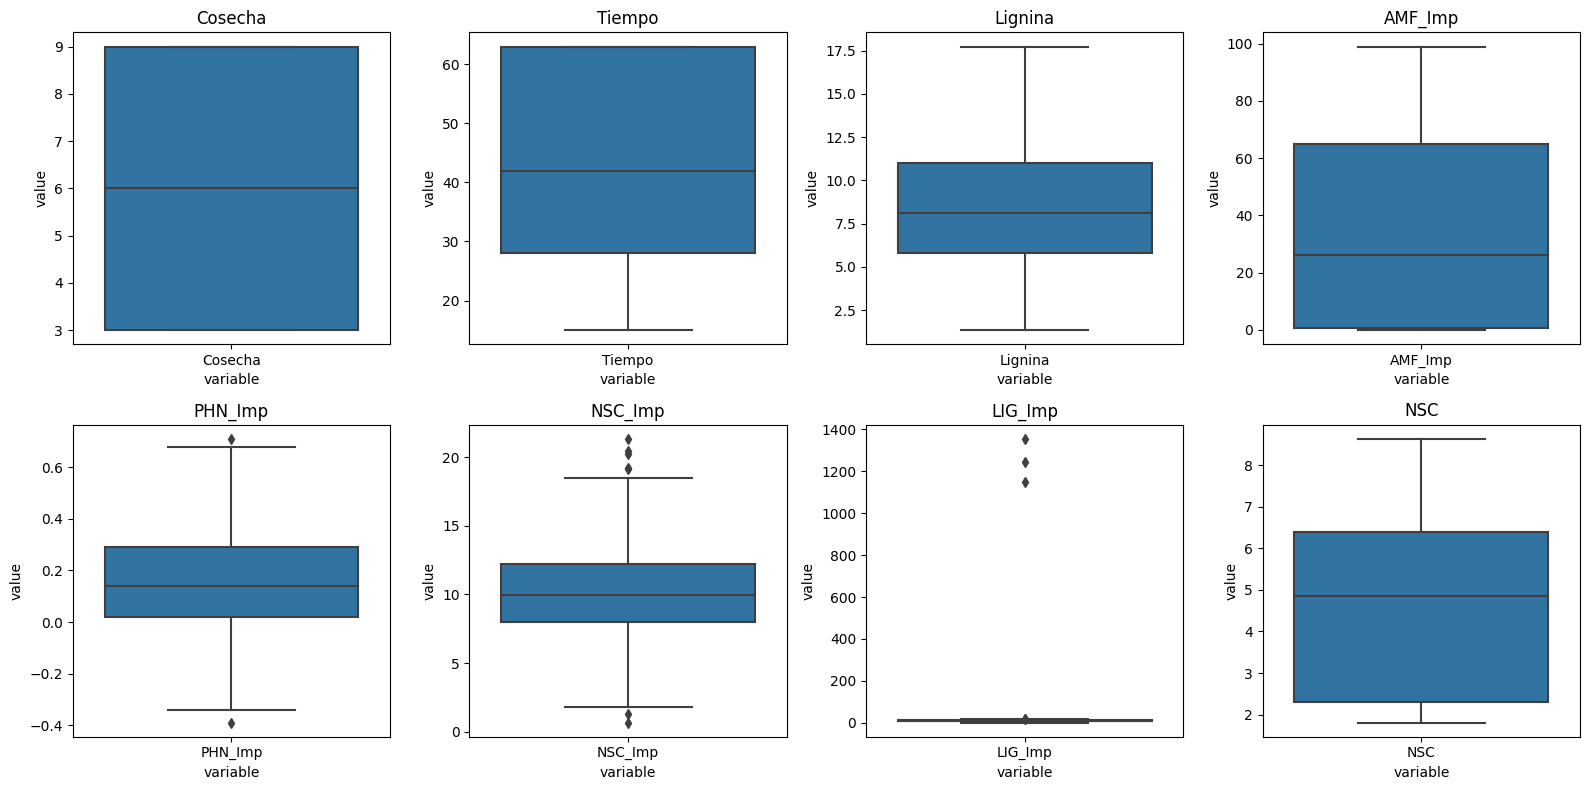

In [24]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 8))

# Gráfico 1
sns.boxplot(data=cosecha_g, x="variable", y="value", ax=axes[0, 0])
axes[0, 0].set_title('Cosecha')

# Gráfico 2
sns.boxplot(data=tiempo_g, x="variable", y="value", ax=axes[0, 1])
axes[0, 1].set_title('Tiempo')

# Gráfico 3
sns.boxplot(data=lignina_g, x="variable", y="value", ax=axes[0, 2])
axes[0, 2].set_title('Lignina')

# Gráfico 4
sns.boxplot(data=amf_imp_g, x="variable", y="value", ax=axes[0, 3])
axes[0, 3].set_title('AMF_Imp')

# Gráfico 5
sns.boxplot(data=phn_imp_g, x="variable", y="value", ax=axes[1, 0])
axes[1, 0].set_title('PHN_Imp')

# Gráfico 6
sns.boxplot(data=nsc_imp_g, x="variable", y="value", ax=axes[1, 1])
axes[1, 1].set_title('NSC_Imp')

# Gráfico 7
sns.boxplot(data=lig_imp_g, x="variable", y="value", ax=axes[1, 2])
axes[1, 2].set_title('LIG_Imp')

# Gráfico 7
sns.boxplot(data=nsc_g, x="variable", y="value", ax=axes[1, 3])
axes[1, 3].set_title('NSC')



# Ajustar el diseño de los subplots
plt.tight_layout()

# Mostrar el gráfico
plt.show()


In [25]:
#Cálculo de Outliers

q1_cosecha = df['Cosecha'].quantile(0.25)
q1_tiempo = df['Tiempo'].quantile(0.25)
q1_lignina = df['Lignina'].quantile(0.25)
q1_amf_imp = df['AMF_Imp'].quantile(0.25)
q1_phn_imp = df["PHN_Imp"].quantile(0.25)
q1_nsc_imp = df['NSC_Imp'].quantile(0.25)
q1_lig_imp = df['LIG_Imp'].quantile(0.25)
q1_nsc = df['NSC'].quantile(0.25)

q3_cosecha = df['Cosecha'].quantile(0.75)
q3_tiempo = df['Tiempo'].quantile(0.75)
q3_lignina = df['Lignina'].quantile(0.75)
q3_amf_imp = df['AMF_Imp'].quantile(0.75)
q3_phn_imp = df["PHN_Imp"].quantile(0.75)
q3_nsc_imp = df['NSC_Imp'].quantile(0.75)
q3_lig_imp = df['LIG_Imp'].quantile(0.75)
q3_nsc = df['NSC'].quantile(0.75)

iqr_cosecha = q3_cosecha - q1_cosecha
iqr_tiempo = q3_tiempo - q1_tiempo
iqr_lignina = q3_lignina - q1_lignina
iqr_amf_imp = q3_amf_imp - q1_amf_imp
iqr_phn_imp = q3_phn_imp - q1_phn_imp
iqr_nsc_imp = q3_nsc_imp - q1_nsc_imp
iqr_lig_imp = q3_lig_imp - q1_lig_imp
iqr_nsc = q3_nsc - q1_nsc

#Limite inferior

lower_cosecha = q1_cosecha - 1.5 * iqr_cosecha
lower_tiempo = q1_tiempo - 1.5 * iqr_tiempo
lower_lignina = q1_lignina - 1.5 * iqr_lignina
lower_amf_imp = q1_amf_imp - 1.5 * iqr_amf_imp
lower_phn_imp = q1_phn_imp - 1.5 * iqr_phn_imp
lower_nsc_imp = q1_nsc_imp - 1.5 * iqr_nsc_imp
lower_lig_imp = q1_lig_imp - 1.5 * iqr_lig_imp
lower_nsc = q1_nsc - 1.5 * iqr_nsc


#Limite Superior
upper_cosecha = q3_cosecha + 1.5 * iqr_cosecha
upper_tiempo = q3_tiempo + 1.5 * iqr_tiempo
upper_lignina = q3_lignina + 1.5 * iqr_lignina
upper_amf_imp = q3_amf_imp + 1.5 * iqr_amf_imp
upper_phn_imp = q3_phn_imp + 1.5 * iqr_phn_imp
upper_nsc_imp = q3_nsc_imp + 1.5 * iqr_nsc_imp
upper_lig_imp = q3_lig_imp + 1.5 * iqr_lig_imp
upper_nsc = q3_nsc + 1.5*iqr_nsc

In [27]:
#Rangos sin outliers
range_cosecha = df[(df['Cosecha'] >= lower_cosecha) & (df['Cosecha'] <= upper_cosecha)]
range_tiempo = df[(df['Tiempo'] >= lower_tiempo) & (df['Tiempo'] <= upper_tiempo)]
range_lignina = df[(df['Lignina'] >= lower_lignina) & (df['Lignina'] <= upper_lignina)]
range_amf_imp = df[(df['AMF_Imp'] >= lower_amf_imp) & (df['AMF_Imp'] <= upper_amf_imp)]
range_phn_imp = df[(df['PHN_Imp'] >= lower_phn_imp) & (df['PHN_Imp'] <= upper_phn_imp)]
range_nsc_imp = df[(df['NSC_Imp'] >= lower_nsc_imp) & (df['NSC_Imp'] <= upper_nsc_imp)]
range_lig_imp = df[(df['LIG_Imp'] >= lower_lig_imp) & (df['LIG_Imp'] <= upper_lig_imp)]
range_nsc = df[(df['NSC'] >= lower_nsc) & (df['NSC'] <= upper_nsc)]

In [28]:
#Outliers
outliers_cosecha = df.shape[0] - range_cosecha.shape[0]
outliers_tiempo = df.shape[0] - range_tiempo.shape[0]
outliers_lignina = df.shape[0] - range_lignina.shape[0]
outliers_amf_imp = df.shape[0] - range_amf_imp.shape[0]
outliers_phn_imp = df.shape[0] - range_phn_imp.shape[0]
outliers_nsc_imp = df.shape[0] - range_nsc_imp.shape[0]
outliers_lig_imp = df.shape[0] - range_lig_imp.shape[0]
outliers_nsc = df.shape[0] - range_nsc.shape[0]

In [29]:
print("Número de Outliers de Cosecha: " + str(outliers_cosecha))
print("Número de Outliers de Tiempo: " + str(outliers_tiempo))
print("Número de Outliers de Lignina: " + str(outliers_lignina))
print("Número de Outliers de AMF_Imp: " + str(outliers_amf_imp))
print("Número de Outliers de PHN_Imp: " + str(outliers_phn_imp))
print("Número de Outliers de NSC_Imp: " + str(outliers_nsc_imp))
print("Número de Outliers de LIG_Imp: " + str(outliers_lig_imp))
print("Número de Outliers de NSC: " + str(outliers_lig_imp))

Número de Outliers de Cosecha: 480
Número de Outliers de Tiempo: 0
Número de Outliers de Lignina: 494
Número de Outliers de AMF_Imp: 0
Número de Outliers de PHN_Imp: 2
Número de Outliers de NSC_Imp: 7
Número de Outliers de LIG_Imp: 5
Número de Outliers de NSC: 5


Basado en el reporte, es necesario anotar lo siguiente

* Se encontraron muchos outliers en los atributos Cosecha y Lignina, por lo que no se utilizarán dentro de la etapa de eliminación de outliers en la limpieza de datos

* Por lo tanto, en caso de que se incluyan estos atributos para el modelo, sólo se eliminarán outliers para los atributos PHN_Imp, NSC_Imp, LIG_Imp y NSC

Correlación

<ipython-input-30-414ffe4d328f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_map = df.corr()


<Axes: >

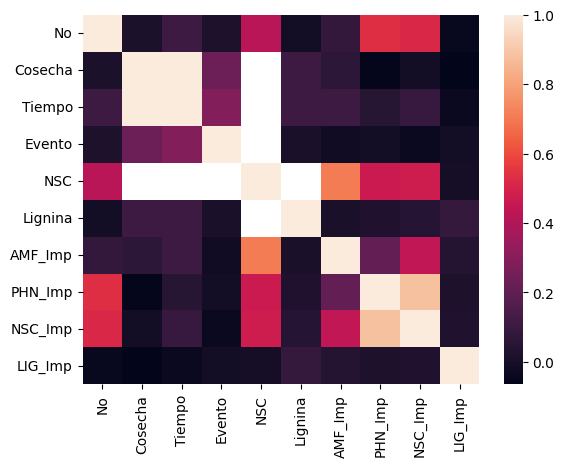

In [30]:
corr_map = df.corr()
sns.heatmap(corr_map)

Hay una correlación alta entre valores como por ejemplo

* NSC con Cosecha, Tiempo, Evento y Lignina

* Cosecha con Tiempo

* PHN_Imp con NSC_Imp

### Verificación de Supuestos

#### Consistencia

Hay variables que según el diccionario son categóricas pero en la descripción del diccionario de los datos aparece como numérica, como es el caso de la variable Cosecha.

#### Validez

Se comprobó que todas las variables de los datos cumplen con las restricciones impuestas en el diccionario de los datos

#### Unicidad

No se presentan filas duplicadas en el dataset

In [31]:
duplicated = df.duplicated(keep = False).sum()
print("Total de filas duplicadas: "+str(duplicated))

Total de filas duplicadas: 0


#### Completitud

Se calcula el rango de completitud de cada variable, con el objetivo de reflejar si es necesario eliminar una columna o no de cada variable

In [32]:
#Identificar Rango de Completitud por Columna
print(1 - (df.isnull().sum() / df.shape[0]))

No          1.000000
Especie     1.000000
Luz         1.000000
Microbio    1.000000
Cosecha     0.602320
Tiempo      1.000000
Evento      1.000000
NSC         0.010771
Lignina     0.590721
AMF_Imp     1.000000
PHN_Imp     1.000000
NSC_Imp     1.000000
LIG_Imp     1.000000
dtype: float64


Vemos que las variables Cosecha, NSC y Lignina presentan un índice de completitud diferente de 1, incluso muy bajo, lo que puede dar señal a que estos datos no se deben utilizar dentro de la construcción del modelo

### LIMPIEZA Y PREPARACIÓN DE DATOS

Basado en lo realizado en el entendimiento de los datos es necesario realizar lo siguiente

* Es necesario eliminar todas las variables que sean categóricas (según el diccionario de datos), esto debido a que el algoritmo de K-Means se basa en el calculo de centroides, por lo que no es muy coherente hacer el cálculo de un centroide para una variable categórica.

* Es necesario eliminar el atributo No, ya que el valor no es importante a la hora de hacer la agrupación, además contiene sólo valores únicos

* Es necesario eliminar la columna NSC, ya que tiene un índice de completitud muy bajo, por lo que no aporta al modelo al tener sólo datos nulos.

* Es necesario eliminar los atributos Cosecha y Lignina dado que presentan un índice de completitud bajo y a la hora de realizar la eliminación de variables nulas, se perderían muchos datos-

* Se eliminarán outliers de los atributos PHN_Imp, NSC_Imp, LIG_Imp, con el objetivo de no afectar el cálculo de centroides en el algoritmo de K-Means

* Es necesario realizar la normalización para darle un igual valor a todas las variables y una mejor convergencia en términos de los centroides en el algoritmo de K-Means



### Eliminar variables categóricas

Se eliminaron las variables categóricas siguiendo que no es coherente hacer el cálculo de centroides para variables enteras, las cuales representan las variables categóricas luego de realzar un encoding

In [34]:
cat_var = ["Especie","Luz", "Microbio","Evento"]
df_cat = df.drop(cat_var,axis=1)

### Eliminar variable No

Se eliminó la variable No ya que no es importante al realizar el modelo, como atributo no aporta a la agrupación y presenta un 100% de datos únicos, por lo que no es conveniente añadir este dato

In [35]:
df_no = df_cat.drop(['No'],axis=1)

###Eliminar atributos con variables nulas

Se eliminarán los atributos NSC, Cosecha y Lignina ya que presentan valores nulos, por lo que para priorizar la cantidad de datos sobre la reducción del sesgo (no se hará ninguna imputación de datos), se elimnarán todas las columnas que contengan valores nulos

In [36]:
df_na = df_no.drop(['NSC','Cosecha','Lignina'],axis=1)

### Eliminación de Outliers

Se hará la eliminación de outliers para los atributos PHN_Imp, NSC_Imp, LIG_Imp

In [39]:
df_phn_imp = df_na[(df_na['PHN_Imp'] >= lower_phn_imp) & (df_na['PHN_Imp'] <= upper_phn_imp)]
df_nsc_imp = df_phn_imp[(df_phn_imp['NSC_Imp'] >= lower_nsc_imp) & (df_phn_imp['NSC_Imp'] <= upper_nsc_imp)]
df_lig_imp = df_nsc_imp[(df_nsc_imp['LIG_Imp'] >= lower_lig_imp) & (df_nsc_imp['LIG_Imp'] <= upper_lig_imp)]

In [40]:
df_lig_imp.shape

(1193, 5)

En total, se evaluarán 1193 datos con una dimensión que abarcan 5 atributos

### Normalización

Se hará una normalización de variables en vista a que el algoritmo de K-Means funciona mejor con los datos normalizados en términos de su convergencia y darle igual importancia a todos los atributos.

In [41]:
scaler = StandardScaler()
df_std = scaler.fit_transform(df_lig_imp)

### Resultado Final - Limpieza

In [42]:
#Hacer un llamado
#Sin normalizar
df_clean = df_lig_imp.copy()
#Normalizado
df_clean_std = df_std.copy()

De este modo, se termina la limpieza de los datos, lista para realizar el modelado del problema mediante el algoritmo de K-Means

In [43]:
df_clean.describe()

,Tiempo,AMF_Imp,PHN_Imp,NSC_Imp,LIG_Imp
count,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000
mean,45.846605,32.360151,0.161098,10.085616,8.832280
std,17.280574,31.716258,0.187526,3.204336,2.715193
min,15.000000,-0.030000,-0.340000,1.810000,1.190000
25%,28.000000,0.610000,0.020000,7.980000,7.030000
50%,42.000000,24.650000,0.140000,9.980000,8.340000
75%,63.000000,64.930000,0.280000,12.150000,11.130000
max,63.000000,99.000000,0.680000,18.320000,17.300000


Por lo tanto, para evaluar el modelo, se tendrán en cuenta únicamente las variables Tiempo, AMF_Imp, PHN_Imp, NSC_Imp, Lig_Imp

## PARTE 3: MODELADO Y EXPLICACIÓN DE RESULTADOS

**Respuesta**
Los resultados para la obtención del modelo se encuentran anexos en el notebook

Para encontrar el mejor modelo, se encontrará el mejor modelo utilizando el coeficiente de la silueta, con el objetivo de encontrar el mejor K para este algoritmo.

Usamos método del codo para encontrar el mejor k

In [44]:
#ESTO TOCA EJECUTARLO EN EL PARCIAL
silhouette_scores = []
k_numbers = []

for n in range(2,10):
  labels = KMeans(n_clusters=n).fit(df_clean_std).labels_
  score = silhouette_score(df_clean_std,labels)
  silhouette_scores.append(score)
  k_numbers.append(n)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Text(0, 0.5, 'Coeficiente de Silueta')

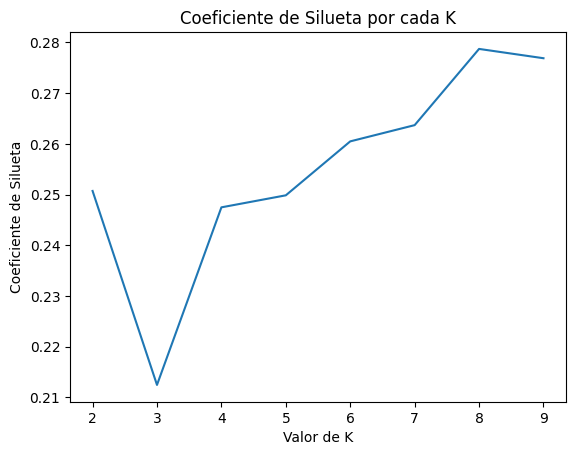

In [45]:
plt.plot(k_numbers,silhouette_scores)
plt.title("Coeficiente de Silueta por cada K")
plt.xlabel("Valor de K")
plt.ylabel("Coeficiente de Silueta")

De acuerdo al modelo podemos ver que los datos que más se ajustan son k = 2.

En teoría, el mejor modelo debería ser con un k = 8, sin embargo, para evitar que se realicen muchas segmentaciones, o en otras palabras, que se generen muchos grupos, se utilizará un k = 2

### CREACIÓN DE MODELO

In [47]:
best_kmeans = KMeans(n_clusters=2,random_state=42)
best_kmeans.fit(df_clean_std)
df_clean['Labels'] = best_kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [51]:
df_clean['Labels'].value_counts()

1    706
0    487
Name: Labels, dtype: int64

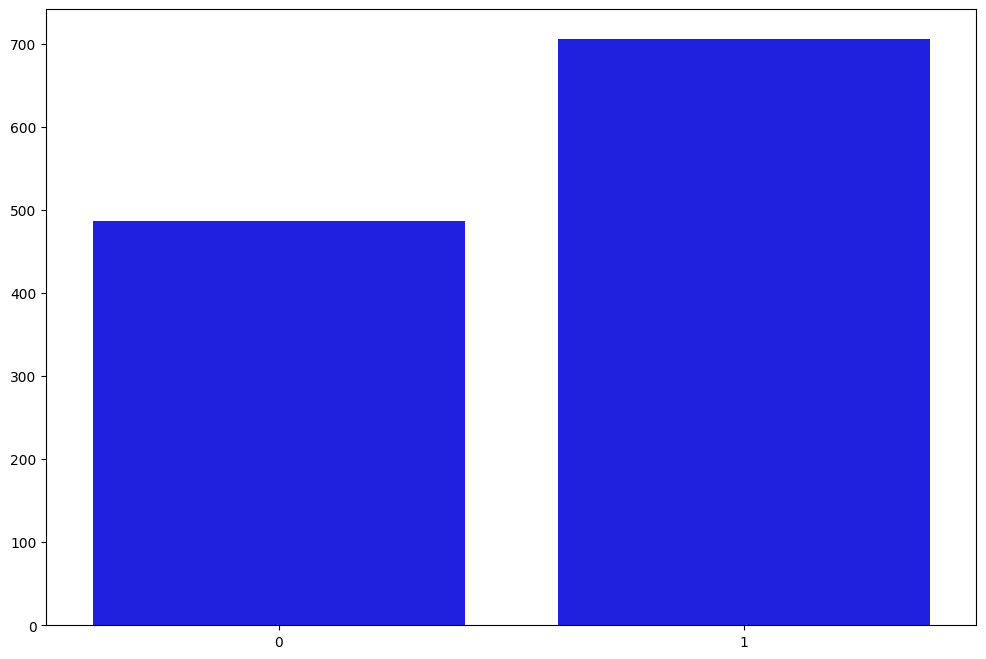

In [48]:
#df_clean['Labels'].value_counts()
cluster_distrib = df_clean['Labels'].value_counts()

fig=plt.figure(figsize=(12,8))
sns.barplot(x=cluster_distrib.index, y=cluster_distrib.values, color='b');

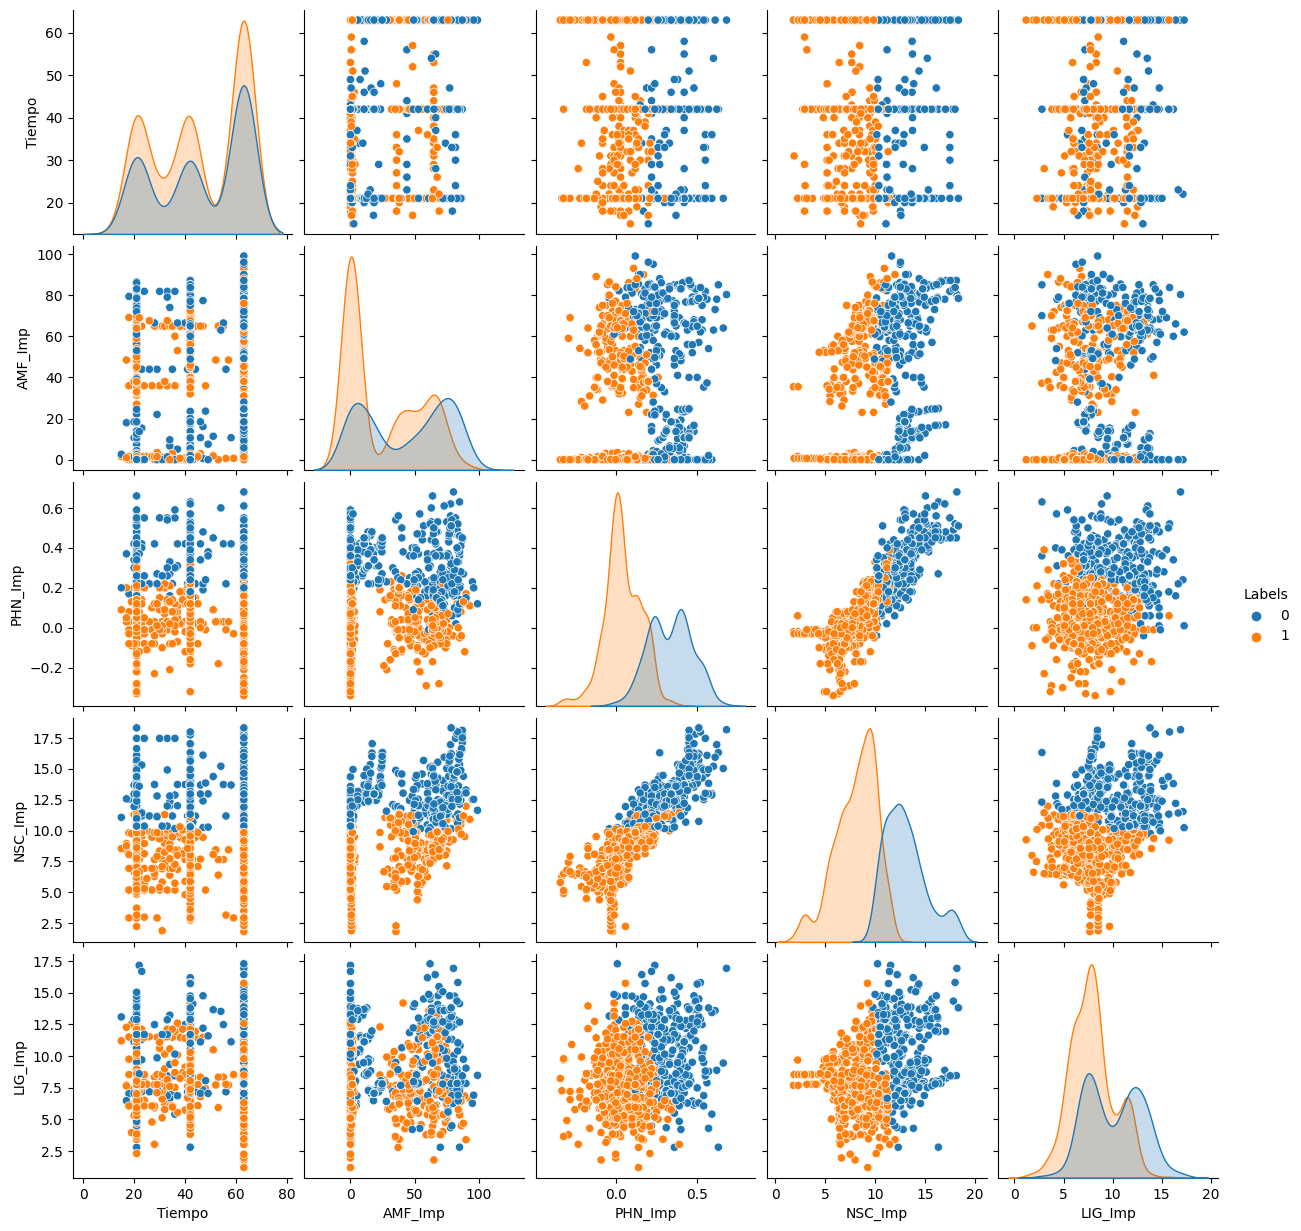

In [49]:
sns.pairplot(data=df_clean, hue="Labels")

### Evaluar Calidad de Clusters

In [59]:
def plot_silhouette(data,
                    labels,
                   ylabel = 'Grupos',
                   xlabel = "Coeficiente de silueta",
                   title = 'Gráfica de silueta'):
    cluster_labels = np.unique(labels)
    print(cluster_labels)
    n_clusters = cluster_labels.shape[0]
    silhouette_vals = silhouette_samples(data,
                                        labels,
                                        metric='euclidean')
    y_ax_lower, y_ax_upper = 0, 0
    yticks = []
    for i, c in enumerate(cluster_labels):
        c_silhouette_vals = silhouette_vals[labels == c]
        c_silhouette_vals.sort()
        y_ax_upper += len(c_silhouette_vals)
        color = cm.jet(float(i) / n_clusters)
        plt.barh(range(y_ax_lower, y_ax_upper),
                        c_silhouette_vals,
                        height=1.0,
                        edgecolor='none',
                        color=color)
        yticks.append((y_ax_lower + y_ax_upper) / 2.)
        y_ax_lower += len(c_silhouette_vals)
    silhouette_avg = np.mean(silhouette_vals)
    plt.axvline(silhouette_avg,
                color="red",
                linestyle="--")
    plt.yticks(yticks, cluster_labels+1)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.title(title)
    plt.show()

[0 1]


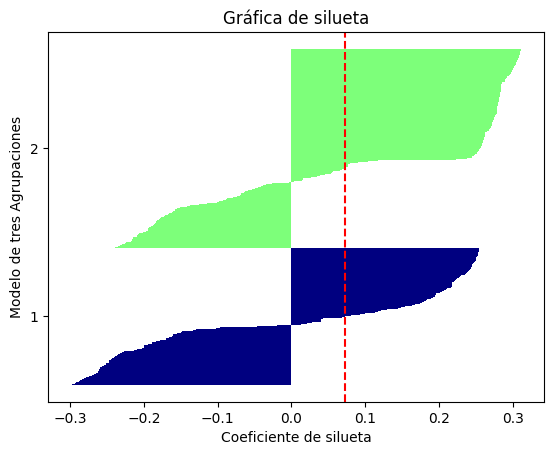

In [60]:
plot_silhouette(data = df_clean,
                labels = df_clean['Labels'],
                ylabel = 'Modelo de tres Agrupaciones')

### EXPLICACIÓN DE RESULTADOS
**RESPUESTA**



En general, podemos ver que la segmentación de características se realizó en 2 grupos, estos grupos los podemos clasificar como un grupo (representado por el 0), en el cual la planta no sobrevivió por mucho tiempo debido a unos bajos índices y porcentajes en las otras características, por lo que pudo haber tenido una escasez de nutrientes, y el otro grupo (representado como 1), se puede observar como las características en las cuales la planta sobrevivió durante mucho tiempo, ya que en su gran mayoría, la cantidad de tiempo es alta, así como sus características

A pesar de obtener un buen modelo y una buena segmentación de características de acuerdo al contexto del problema, es importante anotar que no es recomendable que el modelo sea utilizado dentro de la organización dadas sus bajas métricas en el coeficiente de silueta (el coeficiente es de 0.1). Sin embargo, con una mayor cantidad de datos, se podría explorar otras formas de implementar y resolver este problema